# <center> Econ 390: Computational Economics (with Python) </center>
## <center> Homework 11 (Individual) </center>

# <font color='red'>Name:</font>

# <font color='red'>Instructions:</font>
- Save all of your code to a .py file and name it as **username_hw11.py**, where username is the username of the group member who submits the homework. 
    - If you work in Jupyter notebook -- you can export it via 'File -> Downloaded As -> Python (.py)' option in the menu bar or copy and paste the code into a blank .py file. **In either case you should remove any test cells/code that is outside of functions.**
    - Submit only username_hw11.py file
- For each question, your file should contain a function labeled **q#** with input/output requirements specified below. 
    - The input refers to the arguments passed to the function. 
    - The output refers to what is returned by the function.
    - We may require output to file or screen within a function, but if that is the case it will be clearly specified.
    - Your functions may call other functions or classes that you create, but they have to be included in the file (i.e., the file that you submit should be self-contained).
    - If your function calls on functions from other libraries, you need to load them within the function (e.g., if you use the os library you should assume that it has been installed on the computer but it has not been imported before calling your function).
    
- We will run your code using the following code (assuming that your file is in the current working directory):

```python 
from importlib import import_module
m=import_module('username_hw11')
m.q#(args)
```

Grading: Each question is graded on a 3-point scale + 1 point for following the instructions 
- 0 -- no or minimal work submitted (e.g., minor modification of the 'starting point')
- 1 -- some work done but there are errors running/executing the code or results are mostly incomplete
- 2 -- code runs, but results are either somewhat incomplete, incorrect, or there is clear room for improvement (e.g., no comments in the code, graphs are not labelled, etc.) 
- 3 -- all results complete and correct with clear commented code 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
from scipy.interpolate import interp1d
%matplotlib inline

Consider the following variation of the finite horizon inter-temporal consumptions and saving problem discussed in the lecture.

You own a share of stock that pays a dividend $D_t\in\{1,5\}$ each period. Specifically, the dividend realization depends on how well the company does: when the company does well you get $5$ and when the company does poorly you get $1$. Assume that how well the company does is driven by the state of the economy and that the economic transition is modeled by the  Markov Chain process:

$$S \in \{Expansion,Recession\}$$

$$M=\left(\begin{array}{cc} 
.8 & .2\\ 
.4 & .6
\end{array}\right)$$

That is, when the economy is in the Expansion, the dividend is 5, but when the economy is in the recession, the dividend is 1.

Suppose that you begin with $x$ in your savings. Further suppose your utility of consuming $c$ units in a period is given by $u(c)=\sqrt{c}$, and that you live for $T=10$ periods.

In addition, suppose that the assets held at the end of period $t$ yield an interest (with interest rate $r=.05$) that is paid at the beginning.

Investigate the role of the initial starting balance in your savings. Specifically, plot $x \in [0,10]$ on the x-axis and average total lifetime utility on the y-axis.

# Question 1

Step 1: What should you do in period 10? -- spend everything

In this step, define a function, max_asset, to calculate the maximumal asset/wealth possible at period T:
    - input: the starting asset (a1), the maximal income in each period (I), interest rate (r), the number of periods (T)
    - output: a number 
    Hint: max_asset(0,5,0.05,10) = 62.889462677744156


Step 2: Suppose you are in period 9 and you have A=10 in total,and you are in expension, what you are maximizing is: 
$$ u(x)+ .8(Value10((A-x)*1.05+5)+.2(Value10((A-x)*1.05+1)$$

Now, suppose you are in period 9 and you have A=10 in total,and you are in recession, what are you maximizing? 

Write a function named negExpectedPayoff9 to calculate your utility in either expansion or recession. 
    - input: your consumption (x), your asset (A), your state( S, 0 for Expansion and 1 for Recession)
    - output: the corresponding utility 
    Hint: negExpectedPayoff9(x,A,0) = u(x)+ .8(Value10((A-x)*1.05+5)+.2(Value10((A-x)*1.05+1)

<br>

**In your submission write two functions *max_asset* and *negExpectedPayoff***

Here is the outline of how you should structure your code for this question in your submission.

```
def max_asset(a1, I, r, T)
    #...
    return #a number

def negExpectedPayoff9(x, A, state)
    #...
    return #utility
```

**In your .py submission there should be no code outside of functions, except for imports**

In [2]:
def util(x):  # x is consumption
    return np.sqrt(x)

#compute maximums asset/wealth possible at period T
def max_asset(a1,I,r,T):
    return a1+((a1+I)*np.power(1+r,np.arange(start=T-1,stop=0,step=-1))).sum()+I

#Step 1: What should you do in period 10? -- spend everything
NPOINTS = 15
maxAsset=round(max_asset(0,5,0.05,10))
asset_grid10=np.linspace(0,maxAsset,NPOINTS) 
policy10=asset_grid10.copy() #the best policy in period 10 is to spend everything
value10=util(policy10) #the value of having x units is u(x)

V10 = interp1d(asset_grid10, value10, kind='linear')

# Step 2: 
#Suppose you are in period 9 and you have A=10 in total,and you are in expension
# What x maximizes that u(x)+ .8(Value10((A-x)*1.05+1)+.2(Value10((A-x)*1.05+5)?

#Suppose you are in period 9 and you have A=10 in total,and you are in recession
# What x maximizes that u(x)+ .4(Value10((A-x)*1.05+1)+.6(Value10((A-x)*1.05+5)?

A = 10

def negExpectedPayoff9(x,A,S):
    ''' V is the interpolated value function. (Interpolation done via interp1d)'''
    T = np.array([[.8,.2],[.4,.6]])
    
    return -(util(x)+T[S][0]*V10((A-x)*1.05+5)+T[S][1]*V10((A-x)*1.05+1))

#We can pass extra parameters via args=(.)
reExp = so.minimize(negExpectedPayoff9,0,args=(A,0))
print(reExp.x[0])
reRec = so.minimize(negExpectedPayoff9,0,args=(A,1))
print(reRec.x[0])

6.1904761898120375
6.1904761892465405


# Question 2

Step 3: Find the optimal policy in period 9 (i.e., for all possible A)

Hint: your policy and value functions should reflect the two states.

Step 4: Find the optimal policy for every period t (continue working backwards)

<br>

**In your submission wrap you code for this question in a function called q2() which takes no arguments and returns your answer for step 3 and step 4**

Here is the outline of how you should structure your code for this question in your submission. Make sure you return your answers the same order as below in your submission:

```
def q2():
    # ...
    
    return optimal_policy_period9, optimal_policies
```

**In your .py submission there should be no code outside of functions, except for imports**

In [3]:
# Step 3: Find the optimal policy in period 9 (i.e., for all possible A)
maxAsset=round(max_asset(0,5,0.05,9))
asset_grid9=np.linspace(0,maxAsset,NPOINTS)
policy9=np.zeros(shape=(NPOINTS,2),dtype=float)#The third entry corresponds to states of the economy
value9=np.zeros(shape=(NPOINTS,2),dtype=float)

for  i,A in enumerate(asset_grid9):
    if i==0:
        policy9[i][0] = 0
        value9[i][0] = - negExpectedPayoff9(0,0,0)
        
        policy9[i][1] = 0
        value9[i][1] = - negExpectedPayoff9(0,0,1)
    else:     
        bnds = ((0,A),) #set boundaries for the optimizer
        resExp = so.minimize(negExpectedPayoff9,A/2,args=(A,0),bounds=bnds) # find the optimal point when it is an expansion
        policy9[i][0] = resExp.x[0]
        value9[i][0] = -resExp.fun
        
        resRec = so.minimize(negExpectedPayoff9,A/2,args=(A,1),bounds=bnds) #find the optimal point when it is a recesssion
        policy9[i][1] = resRec.x[0]
        value9[i][1] = -resRec.fun
        
V9Exp = interp1d(asset_grid9, value9[:,0], kind='linear')
V9Rec = interp1d(asset_grid9, value9[:,1], kind='linear')

# Step 4: Find the optimal policy for every period t (continue working backwards)

# T=10 #Number of periods
# a1=0 #Starting assets
# I=5 #Income

def negExpectedPayoff(x,A,S,Vexp,Vrec):
    ''' V is the interpolated value function. (Interpolation done via interp1d)'''
    T = np.array([[.8,.2],[.5,.5]])
    
    return -(util(x)+T[S][0]*Vexp((A-x)*1.05+5)+T[S][1]*Vrec((A-x)*1.05+1))

def dynamic_program(a1,I,r,T):
    NPOINTS = 15 
    assets = np.zeros(shape=(T,NPOINTS)) 
    policies = np.zeros(shape=(T,NPOINTS,2)) #The third entry corresponds to states of the economy
    values = np.zeros(shape=(T,NPOINTS,2))

    for t in range(T,0,-1):
        maxAssetPer=max_asset(a1,I,r,T)

        assets[t-1] = np.linspace(0,maxAssetPer,NPOINTS)

        if t==T:

            #Expansion state
            policies[t-1,:,0] = assets[t-1].copy() #the best policy in period 20 is to spend everything
            values[t-1,:,0] = util(policies[t-1,:,0]) #the value of having x units is u(x)

            #Recession state
            policies[t-1,:,1] = assets[t-1].copy() #the best policy in period 20 is to spend everything
            values[t-1,:,1] = util(policies[t-1,:,1]) #the value of having x units is u(x)

        else:

            VnextExp = interp1d(assets[t], values[t,:,0], kind='cubic',fill_value="extrapolate")
            VnextRec = interp1d(assets[t], values[t,:,1], kind='cubic',fill_value="extrapolate")

            for s in [0,1]: #need to go through expansion (0) and recession (1) states

                for i,A in enumerate(assets[t-1]):

                    if i==0:

                        policies[t-1,i,s] = 0
                        values[t-1,i,s] = - negExpectedPayoff(0,0,s,VnextExp,VnextRec)

                    else:

                        bnds = ((0,A),) #set boundaries for the optimizer
                        res = so.minimize(negExpectedPayoff,A/2,args=(A,s,VnextExp,VnextRec),bounds=bnds) #Notice we pass extra parameters to expectedPayoffs via args=(.)
                        policies[t-1,i,s] = res.x[0]
                        values[t-1,i,s] = - res.fun  
    return assets,policies,values

# Question 3

Simulate 1000 times to calculate the average total lifetime utility for each starting balance x.

<br>

**In your submission wrap you code for this question in a function called q3() which takes no arguments and returns None.**

**This function should save a plot called [username]_q3.pdf (replace [username] with your purdue login) to folder hw11_q3_output which has the starting balances x on the x-axis and the average total lifetime utility on the y-axis. Axis labels are required for full points.**

Here is the outline of how you should structure your code for this question in your submission.

```
def q3():
    # ...

    import os
    
    # os.path.join is an operating system independent way to create a path to a file in a directory: e.g. on a Mac it results in 'hw11_q3_output/[username]_q3.pdf'
    plt.savefig(os.path.join('hw11_q3_output', '[username]_q3.pdf'))
    
    return None
```

**In your .py submission there should be no code outside of functions, except for imports**


Text(0.5, 0, 'starting balance')

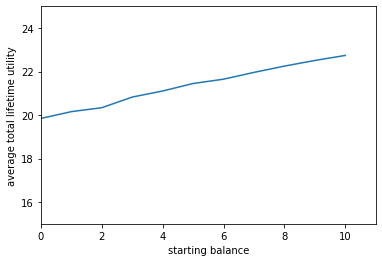

In [4]:
NSIM = 1000  # I conduct 1000 simulations for the sake of time

np.random.seed(0) #set seed so results are replicable
T=10 #Number of periods
a1=0 #Starting assets
I=5 #Income
r=0.05
NPOINTS = 15 

states=[0,1]
income=[5,1]
P=np.array([[.8,.2],[.4,.6]])

average_utilities=[]

# x is the initial endowment from 0 to 10
for x in range(11):
    results = np.empty(NSIM)        #allocate space for the results (i.e., utilities for each of NSIM simulations)
    assets,policies,values=dynamic_program(x,I,r,T)  # call the function defined above
    for sim in range(NSIM):
        balance = x
        utility = 0
        current_state=0
        
        for t in range(T):
            #take interest into consideration
            balance =balance*1.05+ income[current_state]
            pol = interp1d(assets[t], policies[t,:,current_state], kind='linear') # find the continuous policy function
            spend = pol(balance) # find the spending based on the policy function and balance
            utility += util(spend)
            balance -= spend

            next_state = np.random.choice(states, p=P[current_state])
            current_state = next_state.copy()

        results[sim]=utility
        
    average_utilities.append(results.mean())
    
x=list(range(11))
plt.plot(x,average_utilities)
plt.xlim(0,11)
plt.ylim(15,25)
plt.ylabel("average total lifetime utility")
plt.xlabel("starting balance")